# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1075]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1076]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [1077]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

## Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [1078]:
sinasc_raw.munResLat.value_counts()

-8.76889     8437
-10.88205    2182
-9.90846     1729
-12.74137    1590
-11.43387    1374
-11.72226     927
-10.43595     881
-10.77388     781
-10.72357     631
-11.67754     616
-10.20981     583
-9.42556      500
-11.52855     450
-10.41177     432
-11.93554     367
-11.69949     353
-8.78502      337
-11.17321     304
-12.06380     303
-11.72133     261
-13.19503     237
-12.43601     233
-9.71667      226
-13.13056     214
-11.34413     205
-9.37819      205
-10.26310     199
-11.12855     170
-11.76712     168
-10.56842     166
-11.04561     164
-12.55684     162
-12.13178     154
-12.99752     127
-10.61207     112
-9.19187      109
-10.91553     104
-11.90842      99
-11.70974      98
-10.24873      97
-9.85139       93
-11.19624      84
-10.43105      81
-13.49976      80
-10.33887      75
-10.93217      64
-11.91439      54
-9.70554       50
-12.17983      44
-11.82571      43
-13.47656      40
-11.42684      32
Name: munResLat, dtype: int64

In [1079]:
sinasc_2 = sinasc_raw[['munResLat', 'QTDFILVIVO', 'APGAR1']]

In [1080]:
sinasc_2.head()

,munResLat,QTDFILVIVO,APGAR1
0,-11.93554,0.0,9.0
1,-11.93554,1.0,8.0
2,-11.93554,2.0,8.0
3,-12.13178,0.0,9.0
4,-11.93554,1.0,8.0


In [1081]:
sinasc_2.dtypes

munResLat     float64
QTDFILVIVO    float64
APGAR1        float64
dtype: object

Como podemos ver, a latitude está em float, sendo assim, vamos precisar primeiro mudar o formato para depois usar o dicionário para agruparmos em duas categorias.

In [1082]:
sinasc_2['munResLat'] = sinasc_2['munResLat'].astype(str)

C:\Users\Jonatas\AppData\Local\Temp\ipykernel_9868\1002251628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_2['munResLat'] = sinasc_2['munResLat'].astype(str)


In [1083]:
sinasc_2.dtypes

munResLat      object
QTDFILVIVO    float64
APGAR1        float64
dtype: object

In [1084]:
sinasc_3 = sinasc_2.set_index('munResLat')

In [1085]:
sinasc_3.head()

,QTDFILVIVO,APGAR1
munResLat,,
-11.93554,0.0,9.0
-11.93554,1.0,8.0
-11.93554,2.0,8.0
-12.13178,0.0,9.0
-11.93554,1.0,8.0


In [1086]:
sinasc_3.dtypes

QTDFILVIVO    float64
APGAR1        float64
dtype: object

In [1087]:
latitudes = {
    '-8.76889':'Abaixo de -10.5',
    '-10.88205':'Acima de -10.5',
    '-9.90846':'Acima de -10.5',
    '-12.74137':'Acima de -10.5',
    '-11.43387':'Acima de -10.5',
    '-11.72226':'Acima de -10.5',
    '-10.43595':'Abaixo de -10.5',
    '-10.77388':'Acima de -10.5',
    '-10.72357':'Acima de -10.5',
    '-11.67754':'Acima de -10.5',
    '-10.20981':'Abaixo de -10.5',
    '-9.42556':'Abaixo de -10.5',
    '-11.52855':'Acima de -10.5',
    '-10.41177':'Abaixo de -10.5',
    '-11.93554':'Acima de -10.5',
    '-11.69949':'Acima de -10.5',
    '-8.78502':'Abaixo de -10.5',
    '-11.17321':'Acima de -10.5',
    '-12.06380':'Acima de -10.5',
    '-11.72133':'Acima de -10.5',
    '-13.19503':'Acima de -10.5',
    '-12.43601':'Acima de -10.5',
    '-9.71667':'Abaixo de -10.5',
    '-13.13056':'Acima de -10.5',
    '-11.34413':'Acima de -10.5',
    '-9.37819':'Abaixo de -10.5',
    '-10.26310':'Abaixo de -10.5',
    '-11.12855':'Acima de -10.5',
    '-11.76712':'Acima de -10.5',
    '-10.56842':'Acima de -10.5',
    '-11.04561':'Acima de -10.5',
    '-12.55684':'Acima de -10.5',
    '-12.13178':'Acima de -10.5',
    '-12.99752':'Acima de -10.5',
    '-10.61207':'Acima de -10.5',
    '-9.19187':'Abaixo de -10.5',
    '-10.91553':'Acima de -10.5',
    '-11.90842':'Acima de -10.5',
    '-11.70974':'Acima de -10.5',
    '-10.24873':'Abaixo de -10.5',
    '-9.85139':'Abaixo de -10.5',
    '-11.19624':'Acima de -10.5',
    '-10.43105':'Abaixo de -10.5',
    '-13.49976':'Acima de -10.5',
    '-10.33887':'Abaixo de -10.5',
    '-10.93217':'Acima de -10.5',
    '-11.91439':'Acima de -10.5',
    '-9.70554':'Abaixo de -10.5',
    '-12.17983':'Acima de -10.5',
    '-11.82571':'Acima de -10.5',
    '-13.47656':'Acima de -10.5',
    '-11.42684':'Acima de -10.5'
}

In [1088]:
sinasc_3.pivot_table(values=['QTDFILVIVO', 'APGAR1'],
                     index=[latitudes],
                     aggfunc={'QTDFILVIVO':['sum', 'mean', 'min', 'max', 'median', 'var', 'std' ], 
                              'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'var', 'std' ]},
                     dropna=True)

APGAR1                                                      \
                   max      mean median  min       std       sum       var   
munResLat                                                                    
Abaixo de -10.5   10.0  8.231753    8.0  0.0  0.963121   99135.0  0.927602   
Acima de -10.5    10.0  8.067288    8.0  0.0  0.982321  116056.0  0.964954   

                QTDFILVIVO                                                     
                       max      mean median  min       std      sum       var  
munResLat                                                                      
Abaixo de -10.5       12.0  1.158757    1.0  0.0  1.217683  12379.0  1.482751  
Acima de -10.5        30.0  0.975767    1.0  0.0  1.128428  13932.0  1.273350

## Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [1089]:
sinasc_4 = sinasc_raw[['munResArea', 'APGAR5', 'APGAR1']]

In [1090]:
sinasc_4.head()

,munResArea,APGAR5,APGAR1
0,7067.025,10.0,9.0
1,7067.025,9.0,8.0
2,7067.025,10.0,8.0
3,3958.273,10.0,9.0
4,7067.025,10.0,8.0


In [1091]:
sinasc_4.dtypes

munResArea    float64
APGAR5        float64
APGAR1        float64
dtype: object

Como podemos ver, a 'munResArea' está em float, sendo assim, vamos precisar primeiro mudar o formato para depois usar o dicionário para agruparmos em duas categorias.

In [1092]:
sinasc_4['munResArea'] = sinasc_4['munResArea'].astype(str)

C:\Users\Jonatas\AppData\Local\Temp\ipykernel_9868\3932317298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['munResArea'] = sinasc_4['munResArea'].astype(str)


In [1093]:
sinasc_4.dtypes

munResArea     object
APGAR5        float64
APGAR1        float64
dtype: object

In [1094]:
sinasc_raw.munResArea.value_counts()

34096.394    8437
6896.648     2182
4426.571     1729
11518.915    1590
3792.998     1374
1457.888      927
2944.128      881
24855.724     781
1969.850      631
6240.932      616
3265.809      583
8509.270      500
4518.035      450
10071.643     432
7067.025      367
7460.219      353
6843.868      337
1758.465      304
10959.767     303
1703.008      261
2783.300      237
4987.177      233
2651.822      226
1451.060      214
3029.189      205
3863.943      205
1931.378      199
831.857       170
3773.505      168
3442.005      166
1191.875      164
5126.723      162
3958.273      154
3060.321      127
5067.384      112
4081.583      109
807.126       104
1197.796       99
843.446        98
2197.413       97
3135.106       93
798.083        84
965.676        81
1314.352       80
1961.778       75
459.978        64
541.647        54
1717.640       50
2548.683       44
605.692        43
6014.733       40
892.842        32
Name: munResArea, dtype: int64

In [1095]:
sinasc_4 = sinasc_4.set_index('munResArea')

In [1096]:
sinasc_4.head()

,APGAR5,APGAR1
munResArea,,
7067.025,10.0,9.0
7067.025,9.0,8.0
7067.025,10.0,8.0
3958.273,10.0,9.0
7067.025,10.0,8.0


In [1097]:
area = {
    '34096.394' : 'Acima de 3000',
    '6896.648' : 'Acima de 3000',
    '4426.571' : 'Acima de 3000',
    '11518.915' : 'Acima de 3000',
    '3792.998' : 'Acima de 3000',
    '1457.888' : 'Abaixo de 3000',
    '2944.128' : 'Abaixo de 3000',
    '24855.724' : 'Acima de 3000',
    '1969.850' : 'Abaixo de 3000',
    '6240.932' : 'Acima de 3000',
    '3265.809' : 'Acima de 3000',
    '8509.270' : 'Acima de 3000',
    '4518.035' : 'Acima de 3000',
    '10071.643' : 'Acima de 3000',
    '7067.025' : 'Acima de 3000',
    '7460.219' : 'Acima de 3000',
    '6843.868' : 'Acima de 3000',
    '1758.465' : 'Abaixo de 3000',
    '10959.767' : 'Acima de 3000',
    '1703.008' : 'Abaixo de 3000',
    '2783.300' : 'Abaixo de 3000',
    '4987.177' : 'Abaixo de 3000',
    '2651.822' : 'Abaixo de 3000',
    '1451.060' : 'Abaixo de 3000',
    '3029.189' : 'Acima de 3000',
    '3863.943' : 'Acima de 3000',
    '1931.378' : 'Abaixo de 3000',
    '831.857' : 'Abaixo de 3000',
    '3773.505' : 'Acima de 3000',
    '3442.005' : 'Acima de 3000',
    '1191.875' : 'Abaixo de 3000',
    '5126.723' : 'Acima de 3000',
    '3958.273' : 'Acima de 3000',
    '3060.321' : 'Acima de 3000',
    '5067.384' : 'Acima de 3000',
    '4081.583' : 'Acima de 3000',
    '807.126' : 'Abaixo de 3000',
    '1197.796' : 'Abaixo de 3000',
    '843.446' : 'Abaixo de 3000',
    '2197.413' : 'Abaixo de 3000',
    '3135.106' : 'Acima de 3000',
    '798.083' : 'Abaixo de 3000',
    '965.676' : 'Abaixo de 3000',
    '1314.352' :  'Abaixo de 3000',
    '1961.778' :  'Abaixo de 3000',
    '459.978' :  'Abaixo de 3000',
    '541.647' : 'Abaixo de 3000',
    '1717.640' : 'Abaixo de 3000',
    '2548.683' : 'Abaixo de 3000',
    '605.692' : 'Abaixo de 3000',
    '6014.733' : 'Acima de 3000',
    '892.842' : 'Abaixo de 3000'
}

In [1098]:
sinasc_4.pivot_table(values=['APGAR5', 'APGAR1'],
                     index=[area],
                     aggfunc={'APGAR5':['sum', 'mean', 'min', 'max', 'median', 'var', 'std' ], 
                              'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'var', 'std' ]},
                     dropna=True)

APGAR1                                                      \
                  max      mean median  min       std       sum       var   
munResArea                                                                  
Abaixo de 3000   10.0  8.012520    8.0  0.0  1.024664   34558.0  1.049936   
Acima de 3000    10.0  8.166833    8.0  0.0  0.966611  171430.0  0.934338   

               APGAR5                                                      
                  max      mean median  min       std       sum       var  
munResArea                                                                 
Abaixo de 3000   10.0  9.105727    9.0  0.0  0.810956   39273.0  0.657650  
Acima de 3000    10.0  9.199304    9.0  0.0  0.779781  193075.0  0.608058

## Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [1099]:
sinasc_5 = sinasc_raw[['munResAlt', 'APGAR5', 'APGAR1']]

In [1100]:
sinasc_5

,munResAlt,APGAR5,APGAR1
0,338.0,10.0,9.0
1,338.0,9.0,8.0
2,338.0,10.0,8.0
3,397.0,10.0,9.0
4,338.0,10.0,8.0
...,...,...,...
27023,595.0,9.0,8.0
27024,340.0,9.0,8.0
27025,595.0,10.0,9.0
27026,595.0,9.0,8.0


In [1101]:
sinasc_5.dtypes

munResAlt    float64
APGAR5       float64
APGAR1       float64
dtype: object

Para agrupar o 'munResAlt', precisamos tranformar ele em string

In [1102]:
sinasc_5['munResAlt'] = sinasc_5['munResAlt'].astype(str)

C:\Users\Jonatas\AppData\Local\Temp\ipykernel_9868\3929665647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_5['munResAlt'] = sinasc_5['munResAlt'].astype(str)


In [1103]:
sinasc_5.dtypes

munResAlt     object
APGAR5       float64
APGAR1       float64
dtype: object

In [1104]:
sinasc_6 = sinasc_5.set_index('munResAlt')

In [1105]:
sinasc_6.head( )

,APGAR5,APGAR1
munResAlt,,
338.0,10.0,9.0
338.0,9.0,8.0
338.0,10.0,8.0
397.0,10.0,9.0
338.0,10.0,8.0


Para saber as opções contentes no munResAlt, vamos puxar uma média do APGAR5, apenas para entermos como podemos divir os grupos dentro do munResAlt 

In [1106]:
sinasc_6.pivot_table(values=['APGAR5'],
                     index=['munResAlt'],
                     aggfunc={'APGAR5':['mean']},
                     dropna=True)

,APGAR5
,mean
munResAlt,
111.0,9.156098
124.0,9.220000
128.0,9.296460
133.0,9.279009
139.0,9.192597
144.0,8.917172
145.0,9.008621
151.0,9.368910


In [1107]:
resalt = {
    '111.0':'Abaixo de 200',
    '124.0':'Abaixo de 200',
    '128.0':'Abaixo de 200',
    '133.0':'Abaixo de 200',
    '139.0':'Abaixo de 200',
    '144.0':'Abaixo de 200',
    '145.0':'Abaixo de 200',
    '151.0':'Abaixo de 200',
    '153.0':'Abaixo de 200',
    '154.0':'Abaixo de 200',
    '155.0':'Abaixo de 200',
    '157.0':'Abaixo de 200',
    '158.0':'Abaixo de 200',
    '161.0':'Abaixo de 200',
    '163.0':'Abaixo de 200',
    '166.0':'Abaixo de 200',
    '170.0':'Abaixo de 200',
    '177.0':'Abaixo de 200',
    '178.0':'Abaixo de 200',
    '182.0':'Abaixo de 200',
    '186.0':'Abaixo de 200',
    '191.0':'Abaixo de 200',
    '192.0':'Abaixo de 200',
    '197.0':'Abaixo de 200',
    '202.0':'Acima de 200',
    '206.0':'Acima de 200',
    '212.0':'Acima de 200',
    '215.0':'Acima de 200',
    '227.0':'Acima de 200',
    '230.0':'Acima de 200',
    '236.0':'Acima de 200',
    '241.0':'Acima de 200',
    '245.0':'Acima de 200',
    '252.0':'Acima de 200',
    '259.0':'Acima de 200',
    '263.0':'Acima de 200',
    '265.0':'Acima de 200',
    '266.0':'Acima de 200',
    '269.0':'Acima de 200',
    '270.0':'Acima de 200',
    '296.0':'Acima de 200',
    '338.0':'Acima de 200',
    '340.0':'Acima de 200',
    '397.0':'Acima de 200',
    '419.0':'Acima de 200',
    '595.0':'Acima de 200',
    '85.0':'Abaixo de 200',
    '87.0':'Abaixo de 200',
    '99.0':'Abaixo de 200'
}


In [1108]:
sinasc_6.pivot_table(values=['APGAR5', 'APGAR1'],
                     index=[resalt],
                     aggfunc={'APGAR5':['sum', 'mean', 'min', 'max', 'median', 'var', 'std'], 
                              'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'var', 'std']},
                     dropna=True)

APGAR1                                                      \
                 max      mean median  min       std       sum       var   
munResAlt                                                                  
Abaixo de 200   10.0  8.140282    8.0  0.0  0.989649  168862.0  0.979404   
Acima de 200    10.0  8.127849    8.0  0.0  0.968955   50287.0  0.938874   

              APGAR5                                                      
                 max      mean median  min       std       sum       var  
munResAlt                                                                 
Abaixo de 200   10.0  9.196441    9.0  0.0  0.784460  190725.0  0.615377  
Acima de 200    10.0  9.121099    9.0  0.0  0.808099   56414.0  0.653023

## Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [1109]:
sinasc_7 = sinasc_raw[['munResNome', 'IDADEMAE']]

In [1110]:
sinasc_8 = sinasc_7.set_index('munResNome')

Identificando os municipios, para transforma-los em regiao imediata

In [1111]:
sinasc_8.pivot_table(values=['IDADEMAE'],
                     index=['munResNome'],
                     aggfunc={'IDADEMAE':['count']},
                     dropna=True)

,IDADEMAE
,count
munResNome,
Alta Floresta D'Oeste,367
Alto Alegre dos Parecis,154
Alto Paraíso,226
Alvorada D'Oeste,205
Ariquemes,1729
Buritis,583
Cabixi,80
Cacaulândia,75


In [1112]:
regioes_imediatas = {
    'Porto Velho':'Porto Velho',
    'Ji-Paraná':'Ji-Paraná',
    'Ariquemes':'Ariquemes',
    'Vilhena':'Vilhena',
    'Cacoal':'Cacoal',
    'Rolim de Moura':'Cacoal',
    'Jaru':'Jaru',
    'Guajará-Mirim':'Porto Velho',
    'Ouro Preto do Oeste':'Ji-Paraná',
    'Pimenta Bueno':'Cacoal',
    'Buritis':'Ariquemes',
    "Machadinho D'Oeste":'Jaru',
    "Espigão D'Oeste":'Cacoal',
    'Nova Mamoré':'Porto Velho',
    "Alta Floresta D'Oeste":'Cacoal',
    'São Miguel do Guaporé':'Ji-Paraná',
    'Candeias do Jamari':'Porto Velho',
    'Presidente Médici':'Ji-Paraná',
    'São Francisco do Guaporé':'Ji-Paraná',
    "Nova Brasilândia D'Oeste":'Cacoal',
    'Cerejeiras':'Vilhena',
    'Costa Marques':'Ji-Paraná',
    'Alto Paraíso':'Ariquemes',
    'Colorado do Oeste':'Vilhena',
    "Alvorada D'Oeste":'Ji-Paraná',
    'Cujubim':'Ariquemes',
    'Monte Negro':'Ariquemes',
    'Urupá':'Ji-Paraná',
    'Seringueiras':'Ji-Paraná',
    'Campo Novo de Rondônia':'Ariquemes',
    'Mirante da Serra':'Ji-Paraná',
    'Chupinguaia':'Vilhena',
    'Alto Alegre dos Parecis':'Cacoal',
    'Corumbiara':'Vilhena',
    'Governador Jorge Teixeira':'Jaru',
    'Itapuã do Oeste':'Porto Velho',
    'Nova União':'Ji-Paraná',
    "Santa Luzia D'Oeste":'Cacoal',
    'Novo Horizonte do Oeste':'Cacoal',
    'Theobroma':'Jaru',
    'Vale do Anari':'Jaru',
    'Ministro Andreazza':'Cacoal',
    'Vale do Paraíso':'Ji-Paraná',
    'Cabixi':'Vilhena',
    'Cacaulândia':'Ariquemes',
    'Teixeirópolis':'Ji-Paraná',
    "São Felipe D'Oeste":'Cacoal',
    'Rio Crespo':'Ariquemes',
    'Parecis':'Cacoal',
    'Primavera de Rondônia':'Cacoal',
    'Pimenteiras do Oeste':'Vilhena',
    'Castanheiras':'Cacoal',
    'Município ignorado - RO':'Município ignorado - RO'    
}

In [1113]:
regioes_imedias_por_idade_mae = sinasc_8.pivot_table(values=['IDADEMAE'],
                                 index=[regioes_imediatas],
                                 aggfunc={'IDADEMAE':['mean']},
                                 dropna=True)

<AxesSubplot:xlabel='munResNome'>

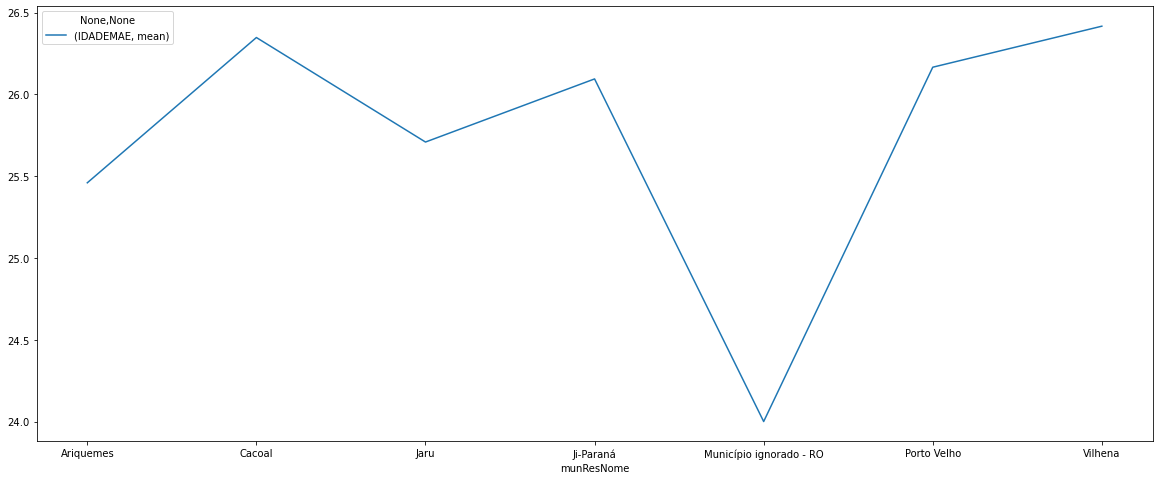

In [1114]:
regioes_imedias_por_idade_mae.plot(figsize=(20,8))

# Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


## IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


baixando a base

In [1115]:
url_a = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'

In [1116]:
IDH = pd.read_html(url_a, header=1)

In [1117]:
IDH = IDH[0] 

Trantando a formatação e excluido os dados que não serão utilizados.

In [1118]:
IDH.head()

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
0,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto
1,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município
2,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
3,1,Porto Velho,0.736,0.764,0.819,0.638
4,2,Vilhena,0.731,0.734,0.808,0.659


In [1119]:
IDH.drop({0, 1, 2, 10, 47, 57, 58}, inplace=True)

In [1120]:
IDH.head()

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
3,1,Porto Velho,0.736,0.764,0.819,0.638
4,2,Vilhena,0.731,0.734,0.808,0.659
5,3,Cacoal,0.718,0.727,0.821,0.620
6,4,Ji-Paraná,0.714,0.728,0.810,0.617
7,5,Pimenta Bueno,0.710,0.726,0.803,0.613


In [1121]:
IDH.drop(['Posição'], axis=1, inplace=True)

In [1122]:
IDH.head()

,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
3,Porto Velho,0.736,0.764,0.819,0.638
4,Vilhena,0.731,0.734,0.808,0.659
5,Cacoal,0.718,0.727,0.821,0.620
6,Ji-Paraná,0.714,0.728,0.810,0.617
7,Pimenta Bueno,0.710,0.726,0.803,0.613


In [1123]:
IDH = IDH.rename(columns = {'IDH municipal':'IDH_municipal',
                           'IDH renda': 'IDH_renda',
                           'IDH longevidade': 'IDH_longevidade',
                           'IDH educação': 'ID_educação'})

In [1124]:
IDH.reset_index(drop=True).head()

,Município,IDH_municipal,IDH_renda,IDH_longevidade,ID_educação
0,Porto Velho,0.736,0.764,0.819,0.638
1,Vilhena,0.731,0.734,0.808,0.659
2,Cacoal,0.718,0.727,0.821,0.620
3,Ji-Paraná,0.714,0.728,0.810,0.617
4,Pimenta Bueno,0.710,0.726,0.803,0.613


In [1125]:
IDH.shape

(52, 5)

O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias: IDH muito alto (0,800 – 1,000), IDH alto (0,700 – 0,799), IDH médio (0,600 0,699), IDH baixo (0,500 – 0,599) e IDH muito baixo (0,000 – 0,499).

## IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [1126]:
url_b = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'

In [1127]:
IFDM = pd.read_html(url_b, header=1)

In [1128]:
IFDM = IFDM[0] 

Trantando a formatação e excluido os dados que não serão utilizados.

In [1129]:
IFDM.head()

,Desenvolvimento alto,Desenvolvimento alto.1,Desenvolvimento alto.2
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383


In [1130]:
IFDM.drop({0, 1, 28, 55, 56}, inplace = True)

In [1131]:
IFDM = IFDM.rename(columns = {'Desenvolvimento alto':'Posição',
                           'Desenvolvimento alto.1': 'Município',
                           'Desenvolvimento alto.2': 'IFDM'})

In [1132]:
IFDM.reset_index(drop=True).head()

,Posição,Município,IFDM
0,1º,Ariquemes,0.7746
1,2º,Vilhena,0.7465
2,3º,Pimenta Bueno,0.7383
3,4º,Porto Velho,0.7257
4,5º,Ji-Paraná,0.7117


In [1133]:
IFDM.drop(['Posição'], axis=1, inplace=True)

In [1134]:
IFDM.shape

(52, 2)

O índice varia de zero (valor mínimo) até 1 (valor máximo), sendo considerado:

Alto, resultados superiores a 0,8 pontos;
Moderado, resultados entre 0,6 e 0,8 pontos;
Regular, resultados entre 0,4 e 0,6 pontos;
Baixo, resultados inferiores a 0,4 pontos;

## PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


As tabelas de PIB, estão separadas dentro da página, sendo assim fiz uma tabela auxiliar para conseguir baixá-la.

In [1135]:
PIB = pd.read_csv('PIB_RO_por_município.csv')

In [1136]:
PIB = pd.DataFrame(PIB)

In [1137]:
PIB.head()

,Município,PIB
0,Porto Velho,17912070
1,Ji-Paraná,3783972
2,Vilhena,2831175
3,Ariquemes,2579830
4,Cacoal,2261644


In [1138]:
PIB.shape

(52, 2)

Acima, pegamos as 3 tabelas de IDH, IFDM e PIB. agora vamos unir elas, tendo como base o Município e para fazer os insights pedidos no próximo exercício.

In [1139]:
PIB_IFDM = PIB.merge(IFDM)

In [1140]:
PIB_IFDM_IDH = PIB_IFDM.merge(IDH)

In [1141]:
PIB_IFDM_IDH.head()

,Município,PIB,IFDM,IDH_municipal,IDH_renda,IDH_longevidade,ID_educação
0,Porto Velho,17912070,0.7257,0.736,0.764,0.819,0.638
1,Ji-Paraná,3783972,0.7117,0.714,0.728,0.810,0.617
2,Vilhena,2831175,0.7465,0.731,0.734,0.808,0.659
3,Ariquemes,2579830,0.7746,0.702,0.716,0.806,0.600
4,Cacoal,2261644,0.7111,0.718,0.727,0.821,0.620


Vamos agora, trazer alguns dados da planilha 'base', sinasc_raw. Faremos isso para depois compilar ao merge das 3 tabelas e conseguirmos uma boa planilhas para bucar os insights

IDADEMAE, PESO, APGAR5 - foram as informações que decidi separar, além no NomMun que seria a coluna base.

In [1142]:
sinasc_consolidada = sinasc_raw[['munResNome', 'IDADEMAE', 'PESO', 'APGAR5']]

In [1143]:
sinasc_consolidada.head()

,munResNome,IDADEMAE,PESO,APGAR5
0,Alta Floresta D'Oeste,19,3685,10.0
1,Alta Floresta D'Oeste,29,3055,9.0
2,Alta Floresta D'Oeste,37,3460,10.0
3,Alto Alegre dos Parecis,30,2982,10.0
4,Alta Floresta D'Oeste,30,3310,10.0


In [1144]:
sinasc_consolidada = sinasc_consolidada.rename(columns = {'munResNome':'Município'})

In [1145]:
sinasc_aux = sinasc_consolidada.groupby('Município')[['IDADEMAE', 'PESO', 'APGAR5']].mean()

In [1146]:
sinasc_aux.shape

(53, 3)

Vamos agora adicionar as informações de de IDH, PIB e etc, a esta base de dados com as informações de Idade da Mãe, Peso e APGAR5.

In [1147]:
sinasc_aux.head()

,IDADEMAE,PESO,APGAR5
Município,,,
Alta Floresta D'Oeste,25.991826,3240.841962,9.239782
Alto Alegre dos Parecis,24.844156,3261.383117,9.123377
Alto Paraíso,24.960177,3217.969027,9.296460
Alvorada D'Oeste,25.770732,3225.712195,9.126829
Ariquemes,25.607866,3251.362637,9.192597


In [1148]:
PIB_IFDM_IDH.head()

,Município,PIB,IFDM,IDH_municipal,IDH_renda,IDH_longevidade,ID_educação
0,Porto Velho,17912070,0.7257,0.736,0.764,0.819,0.638
1,Ji-Paraná,3783972,0.7117,0.714,0.728,0.810,0.617
2,Vilhena,2831175,0.7465,0.731,0.734,0.808,0.659
3,Ariquemes,2579830,0.7746,0.702,0.716,0.806,0.600
4,Cacoal,2261644,0.7111,0.718,0.727,0.821,0.620


In [1149]:
sinasc_geral = pd.merge(sinasc_aux, PIB_IFDM_IDH, how = 'outer', on='Município').dropna()

In [1150]:
sinasc_geral.head()

,Município,IDADEMAE,PESO,APGAR5,PIB,IFDM,IDH_municipal,IDH_renda,IDH_longevidade,ID_educação
1,Alto Alegre dos Parecis,24.844156,3261.383117,9.123377,213410.0,0.5046,0.592,0.603,0.777,0.443
2,Alto Paraíso,24.960177,3217.969027,9.296460,358000.0,0.5735,0.625,0.664,0.804,0.457
4,Ariquemes,25.607866,3251.362637,9.192597,2579830.0,0.7746,0.702,0.716,0.806,0.600
5,Buritis,25.559177,3229.876501,9.714777,726000.0,0.6199,0.616,0.650,0.751,0.479
6,Cabixi,26.037500,3336.100000,9.125000,113031.0,0.5887,0.650,0.650,0.757,0.559


Temos a base de dados, o mapping manual para encaixar o IDH, IFDM e PIB em categorias, será muito trabalhoso, vamos usar o .cut para fazer a categorização.

IDH: O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias: IDH muito alto (0,800 – 1,000), IDH alto (0,700 – 0,799), IDH médio (0,600 0,699), IDH baixo (0,500 – 0,599) e IDH muito baixo (0,000 – 0,499).

In [1151]:
sinasc_geral.dtypes

Município           object
IDADEMAE           float64
PESO               float64
APGAR5             float64
PIB                float64
IFDM                object
IDH_municipal       object
IDH_renda           object
IDH_longevidade     object
ID_educação         object
dtype: object

In [1152]:
sinasc_geral['IDH_municipal'] = sinasc_geral['IDH_municipal'].astype(float)

In [1153]:
sinasc_geral.dtypes

Município           object
IDADEMAE           float64
PESO               float64
APGAR5             float64
PIB                float64
IFDM                object
IDH_municipal      float64
IDH_renda           object
IDH_longevidade     object
ID_educação         object
dtype: object

In [1154]:
sinasc_geral['IDH_Categoria'] = pd.cut(sinasc_geral.IDH_municipal, 
                                       bins=[0, 0.5, 0.6, 0.7, 0.8, np.inf], 
                                       labels=['IDH muito baixo', ' IDH baixo','IDH médio', 'IDH alto', 'IDH muito alto'])

IFDM: O índice varia de zero (valor mínimo) até 1 (valor máximo), sendo considerado:

Alto, resultados superiores a 0,8 pontos;
Moderado, resultados entre 0,6 e 0,8 pontos;
Regular, resultados entre 0,4 e 0,6 pontos;
Baixo, resultados inferiores a 0,4 pontos;

In [1155]:
sinasc_geral['IFDM'] = sinasc_geral['IFDM'].astype(float)

In [1156]:
sinasc_geral['IFDM_Categoria'] = pd.cut(sinasc_geral.IFDM, 
                                       bins=[0, 0.4, 0.6, 0.8, np.inf], 
                                       labels=['IFDM baixo', 'IFDM regular','IFDM moderado', 'IFDM alto'])

PIB: Aqui não existe uma categoriazação adjetiva, os parametros estão nas quantidades:
Acima de 1 bilhão, Acima de 500 Milhões, Acima de 300 Milhões, Acima de 200 Milhões, Acima de 100 Milhões ou Abaixo de 100 Milhões.

In [1158]:
sinasc_geral['PIB'] = sinasc_geral['PIB'].astype(int)

In [1159]:
sinasc_geral['PIB_Categoria'] = pd.cut(sinasc_geral.PIB, 
                                       bins=[0, 100000, 200000, 300000, 500000, 1000000, np.inf], 
                                       labels=['Abaixo de 100 Milhões', 'Acima de 100 Milhões',
                                               'Acima de 200 Milhões', 'Acima de 300 Milhões',
                                               'Acima de 500 Milhões', 'Acima de 1 Bilhão'])

Agora temos uma planilha com todas as informações necessárias para o próximo exercício.

In [1160]:
sinasc_geral.head()

,Município,IDADEMAE,PESO,APGAR5,PIB,IFDM,IDH_municipal,IDH_renda,IDH_longevidade,ID_educação,IDH_Categoria,IFDM_Categoria,PIB_Categoria
1,Alto Alegre dos Parecis,24.844156,3261.383117,9.123377,213410,0.5046,0.592,0.603,0.777,0.443,IDH baixo,IFDM regular,Acima de 200 Milhões
2,Alto Paraíso,24.960177,3217.969027,9.296460,358000,0.5735,0.625,0.664,0.804,0.457,IDH médio,IFDM regular,Acima de 300 Milhões
4,Ariquemes,25.607866,3251.362637,9.192597,2579830,0.7746,0.702,0.716,0.806,0.600,IDH alto,IFDM moderado,Acima de 1 Bilhão
5,Buritis,25.559177,3229.876501,9.714777,726000,0.6199,0.616,0.650,0.751,0.479,IDH médio,IFDM moderado,Acima de 500 Milhões
6,Cabixi,26.037500,3336.100000,9.125000,113031,0.5887,0.650,0.650,0.757,0.559,IDH médio,IFDM regular,Acima de 100 Milhões


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [1171]:
Informacoes_IDH = sinasc_geral.groupby('IDH_Categoria')[['IDADEMAE', 'PESO', 'APGAR5']].mean()

In [1185]:
Informacoes_IDH.dropna().round(2)

,IDADEMAE,PESO,APGAR5
IDH_Categoria,,,
IDH baixo,25.35,3238.90,9.21
IDH médio,26.02,3237.09,9.18
IDH alto,26.13,3255.44,9.14


Conforme vemos na tabela acima, a médias geral de Idade da Mãe, Peso e Apgar5 com base no IDH tem uma variação baixa.

In [1186]:
Informacoes_PIB = sinasc_geral.groupby('PIB_Categoria')[['IDADEMAE', 'PESO', 'APGAR5']].mean()

In [1188]:
Informacoes_PIB.round(2)

,IDADEMAE,PESO,APGAR5
PIB_Categoria,,,
Abaixo de 100 Milhões,26.49,3201.41,9.08
Acima de 100 Milhões,25.77,3252.78,9.17
Acima de 200 Milhões,25.11,3235.47,9.31
Acima de 300 Milhões,25.70,3242.15,9.10
Acima de 500 Milhões,25.88,3234.47,9.35
Acima de 1 Bilhão,26.17,3254.22,9.13


Usando o PIB como parametro, já começamos a ver algumas informações interessantes.
A idade média da mãe, primeiro gráfico, prefiro descartar, pois as médias estão dentro de 25 a 26,5 anos. O que consideramos uma idade saudavel para as mães.

Para Peso, gráfico 2 e APGAR5, gráfico 3. Os locais com PIB abaixo de 100 Milhões tem uma médias mais baixa.

array([<AxesSubplot:xlabel='PIB_Categoria'>,
       <AxesSubplot:xlabel='PIB_Categoria'>,
       <AxesSubplot:xlabel='PIB_Categoria'>], dtype=object)

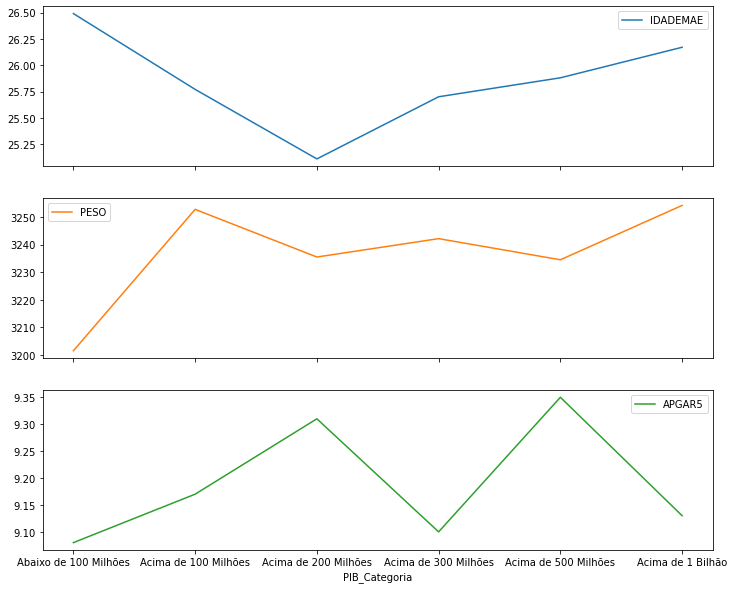

In [1190]:
Informacoes_PIB.round(2).plot.line(figsize=(12,10), subplots=True)

In [1191]:
Informacoes_IFDM = sinasc_geral.groupby('IFDM_Categoria')[['IDADEMAE', 'PESO', 'APGAR5']].mean()

In [1194]:
Informacoes_IFDM.round(2).dropna()

,IDADEMAE,PESO,APGAR5
IFDM_Categoria,,,
IFDM regular,25.69,3241.85,9.19
IFDM moderado,26.14,3237.96,9.17


Como os IFDM são: Moderado e Regular, a média geral acaba ficando muito próxima.